Dataset: 

https://archive.ics.uci.edu/ml/datasets/Steel+Industry+Energy+Consumption+Dataset

    https://archive.ics.uci.edu/ml/machine-learning-databases/00618/Steel_industry_data.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO, BytesIO
import urllib.request
from scipy.io.arff import loadarff

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

from sklearn.linear_model import LogisticRegression,SGDClassifier, LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier, RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVC, SVR 
import xgboost as xgb
from catboost import CatBoostClassifier, CatBoostRegressor

from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, log_loss, precision_score,recall_score, f1_score, roc_curve,auc, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
#url='https://archive.ics.uci.edu/ml/machine-learning-databases/00322/data.zip'

In [3]:
redwineurl = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
whitewineurl = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

dfredwine = pd.read_csv(whitewineurl, sep=";")
dfredwine['color']='red'

dfwhitewine = pd.read_csv(redwineurl, sep=";")
dfwhitewine['color']='white'

frames = [dfwhitewine, dfredwine]
dfwines= pd.concat(frames)

In [4]:
dfwines.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
763,5.0,0.440,0.04,18.60,0.039,38.0,128.0,0.99850,3.37,0.57,10.2,6,red
288,8.7,0.520,0.09,2.50,0.091,20.0,49.0,0.99760,3.34,0.86,10.6,7,white
1290,8.4,0.160,0.33,1.50,0.033,16.0,98.0,0.99400,3.14,0.42,9.7,6,red
322,7.8,0.620,0.05,2.30,0.079,6.0,18.0,0.99735,3.29,0.63,9.3,5,white
412,7.2,0.190,0.39,1.20,0.036,32.0,85.0,0.99180,3.16,0.50,10.5,5,red
1406,8.2,0.220,0.36,6.80,0.034,12.0,90.0,0.99440,3.01,0.38,10.5,8,red
2772,6.2,0.290,0.32,3.60,0.026,39.0,138.0,0.98920,3.31,0.37,13.1,7,red
1145,6.8,0.320,0.18,7.50,0.041,71.0,223.0,0.99590,3.14,0.41,8.9,5,red
3515,6.8,0.190,0.33,1.30,0.031,22.0,87.0,0.98987,3.08,0.62,12.3,7,red
2883,6.8,0.475,0.33,3.95,0.047,16.0,81.0,0.98988,3.23,0.53,13.4,7,red


In [5]:
column_to_move = dfwines.pop("color")
# insert column with insert(location, column_name, column_value)
dfwines.insert(0, "color", column_to_move)

In [6]:
dfwines.head(10)

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,white,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,white,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,white,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,white,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,white,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,white,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,white,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,white,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,white,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [7]:
df= dfwines.copy()

In [8]:
#To check the number of Rows & features

In [9]:
print (f'Total no. of rows : {df.shape[0]}')
print (f'Total no. of features : {df.shape[1]}')

Total no. of rows : 6497
Total no. of features : 13


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [11]:
#T detect missing value exits in the given dataset

In [12]:
df.isnull().sum()

color                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

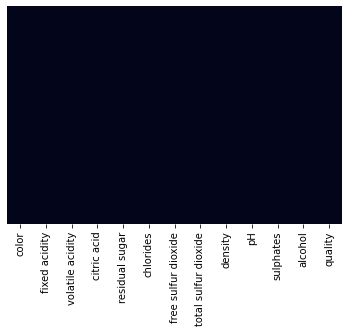

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [14]:
#To check whether any categorical features are exists

In [15]:
df.nunique()

color                     2
fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64

In [16]:
df.drop(['color'], axis=1, inplace=True)

In [17]:
def plot(no_of_rows, no_of_columns, dataframe, plottype):  
    fig=plt.figure(figsize=(15,10))
    n_rows=no_of_rows
    n_cols=no_of_columns
    # Create the subplots
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,)
    fig.set_size_inches(15, 15)
    for i, column in enumerate(dataframe.columns):
        if plottype=='box':
            sns.boxplot(dataframe[column],ax=axes[i//n_cols,i%n_cols], orient ='h')
        elif plottype=='hist':
            sns.histplot(dataframe[column],ax=axes[i//n_cols,i%n_cols],  color='blue', kde=True, bins=30)
        elif plottype=='dist':
            sns.distplot(dataframe[column],ax=axes[i//n_cols,i%n_cols],  color='blue', kde=True, bins=30)
        elif plottype=='scatter':
            sns.scatterplot(x=dataframe[column],ax=axes[i//n_cols,i%n_cols],  )            
        else:
            print('Type not defined')

<Figure size 1080x720 with 0 Axes>

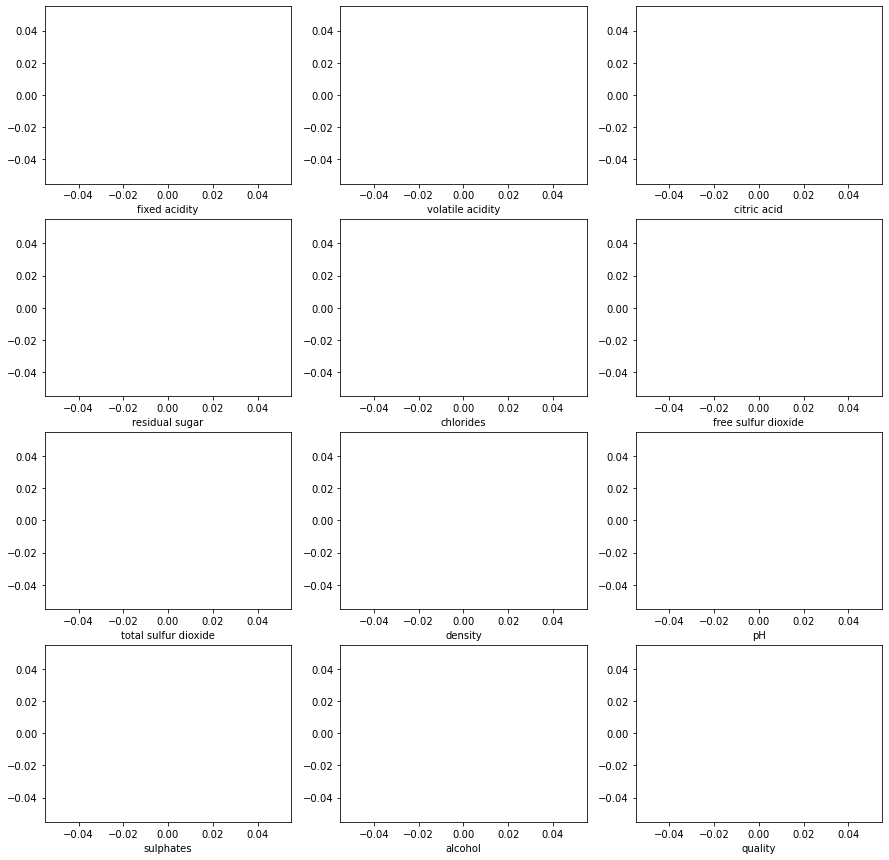

In [18]:
plot(4,3,df,'scatter')

<Figure size 1080x720 with 0 Axes>

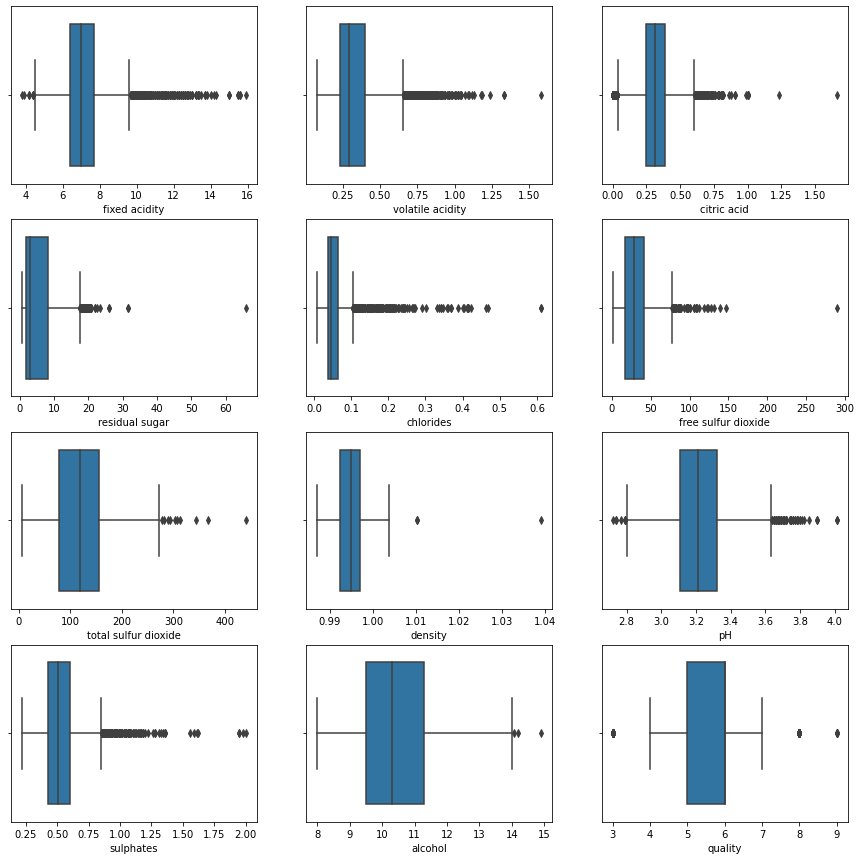

In [19]:
plot(4,3,df,'box')

<Figure size 1080x720 with 0 Axes>

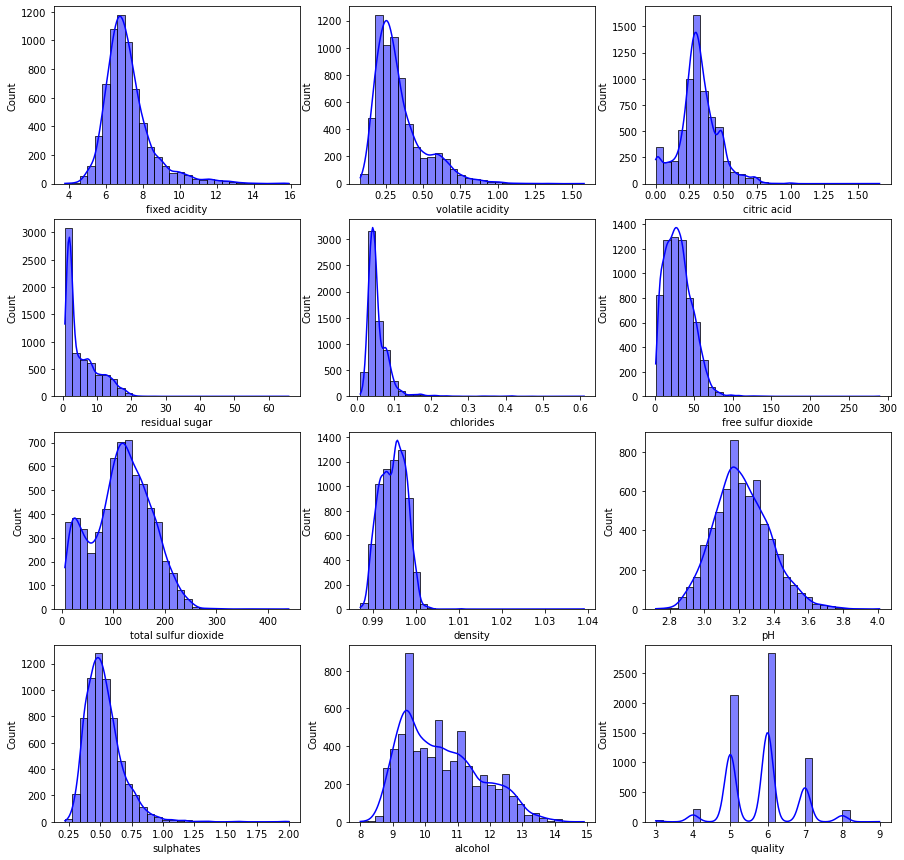

In [20]:
plot(4,3,df,'hist')

<Figure size 1080x720 with 0 Axes>

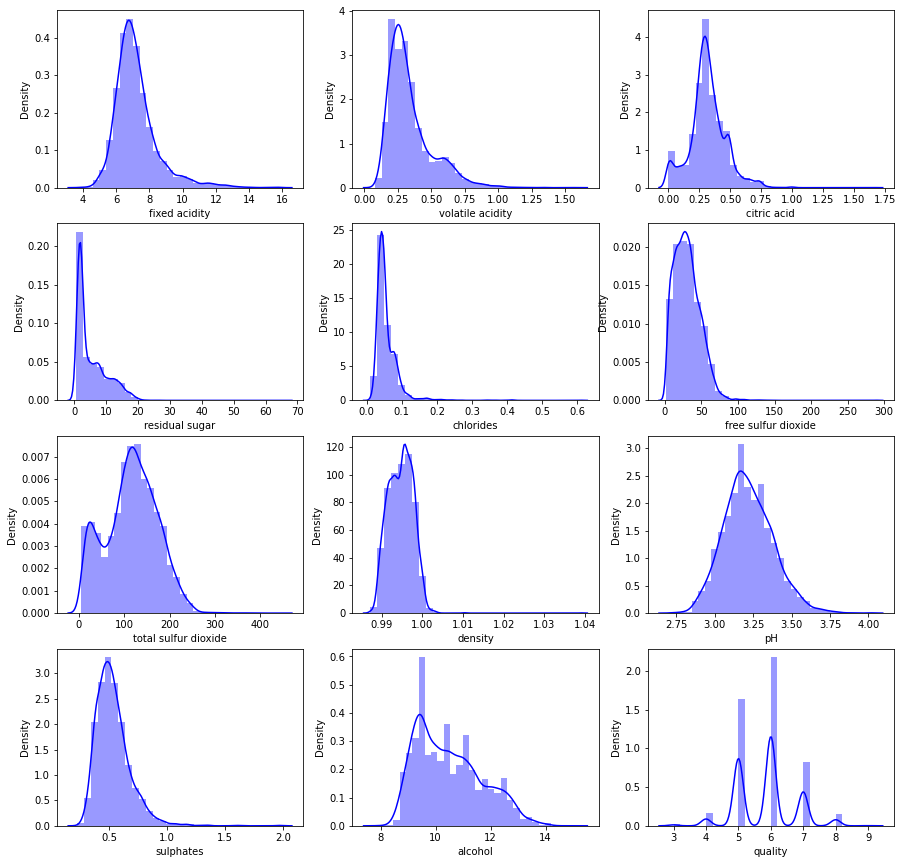

In [21]:
plot(4,3,df,'dist')

In [22]:
for  column in df.columns:
    print(f'Skewness for {column} is : {df[column].skew()}')

Skewness for fixed acidity is : 1.7232896467669239
Skewness for volatile acidity is : 1.4950965423685545
Skewness for citric acid is : 0.4717306724886708
Skewness for residual sugar is : 1.4354042627889907
Skewness for chlorides is : 5.399827731969901
Skewness for free sulfur dioxide is : 1.2200660740665203
Skewness for total sulfur dioxide is : -0.0011774782344379131
Skewness for density is : 0.5036017301419993
Skewness for pH is : 0.38683879806082694
Skewness for sulphates is : 1.7972700037785152
Skewness for alcohol is : 0.565717729098518
Skewness for quality is : 0.18962269337269683


In [23]:
def outerlier_detection_replace_with_median(data):
    for column in data.columns:
        # calculate interquartile range
        q25, q75 = np.percentile(data[column], 25), np.percentile(data[column], 75)
        iqr = q75 - q25
        
        # calculate the outlier cutoff
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off
        
        median = np.median(data[column])
        
        print('Feature: %s, Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f,Median=%.3f, Lower=%.3f, Upper=%.3f' % (column, q25, q75, iqr,median,lower,upper))

        #data[column]=np.where(data[column]>upper,upper,np.where(data[column]<lower,lower,data[column]))
        data[column]=np.where(data[column]>upper,median,np.where(data[column]<lower,median,data[column]))
        
    return data

In [24]:
df_out= outerlier_detection_replace_with_median(df)

Feature: fixed acidity, Percentiles: 25th=6.400, 75th=7.700, IQR=1.300,Median=7.000, Lower=4.450, Upper=9.650
Feature: volatile acidity, Percentiles: 25th=0.230, 75th=0.400, IQR=0.170,Median=0.290, Lower=-0.025, Upper=0.655
Feature: citric acid, Percentiles: 25th=0.250, 75th=0.390, IQR=0.140,Median=0.310, Lower=0.040, Upper=0.600
Feature: residual sugar, Percentiles: 25th=1.800, 75th=8.100, IQR=6.300,Median=3.000, Lower=-7.650, Upper=17.550
Feature: chlorides, Percentiles: 25th=0.038, 75th=0.065, IQR=0.027,Median=0.047, Lower=-0.003, Upper=0.106
Feature: free sulfur dioxide, Percentiles: 25th=17.000, 75th=41.000, IQR=24.000,Median=29.000, Lower=-19.000, Upper=77.000
Feature: total sulfur dioxide, Percentiles: 25th=77.000, 75th=156.000, IQR=79.000,Median=118.000, Lower=-41.500, Upper=274.500
Feature: density, Percentiles: 25th=0.992, 75th=0.997, IQR=0.005,Median=0.995, Lower=0.985, Upper=1.004
Feature: pH, Percentiles: 25th=3.110, 75th=3.320, IQR=0.210,Median=3.210, Lower=2.795, Upper=3

In [25]:
for  column in df.columns:
    print(f'Skewness for {column} is : {df[column].skew()}')

Skewness for fixed acidity is : 0.43549763389714713
Skewness for volatile acidity is : 0.952029618344847
Skewness for citric acid is : 0.04073796843688115
Skewness for residual sugar is : 1.080685557330038
Skewness for chlorides is : 0.8831955071396203
Skewness for free sulfur dioxide is : 0.42079370928588355
Skewness for total sulfur dioxide is : -0.07494466296906825
Skewness for density is : -0.026301302830194048
Skewness for pH is : 0.18062631469115634
Skewness for sulphates is : 0.515930305471545
Skewness for alcohol is : 0.5580855009070658
Skewness for quality is : -0.04739616171740616


In [26]:
for  column in df_out.columns:
    print(f'Skewness for {column} is : {df_out[column].skew()}')

Skewness for fixed acidity is : 0.43549763389714713
Skewness for volatile acidity is : 0.952029618344847
Skewness for citric acid is : 0.04073796843688115
Skewness for residual sugar is : 1.080685557330038
Skewness for chlorides is : 0.8831955071396203
Skewness for free sulfur dioxide is : 0.42079370928588355
Skewness for total sulfur dioxide is : -0.07494466296906825
Skewness for density is : -0.026301302830194048
Skewness for pH is : 0.18062631469115634
Skewness for sulphates is : 0.515930305471545
Skewness for alcohol is : 0.5580855009070658
Skewness for quality is : -0.04739616171740616


<Figure size 1080x720 with 0 Axes>

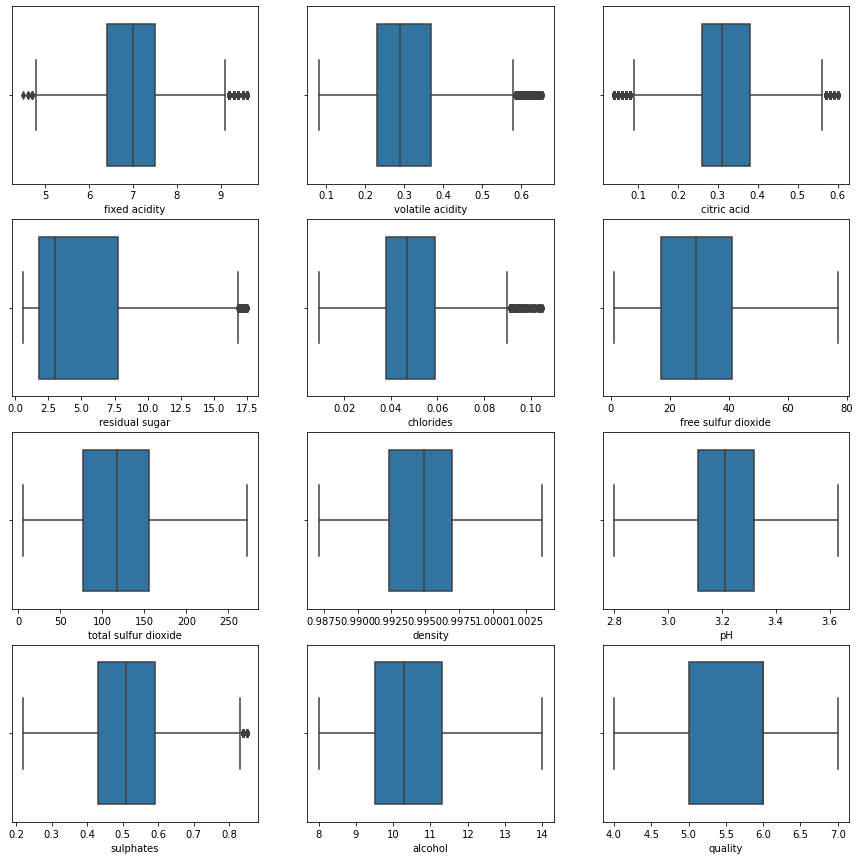

In [27]:
plot(4,3,df_out,'box')

In [28]:
df_out.shape

(6497, 12)

<AxesSubplot:>

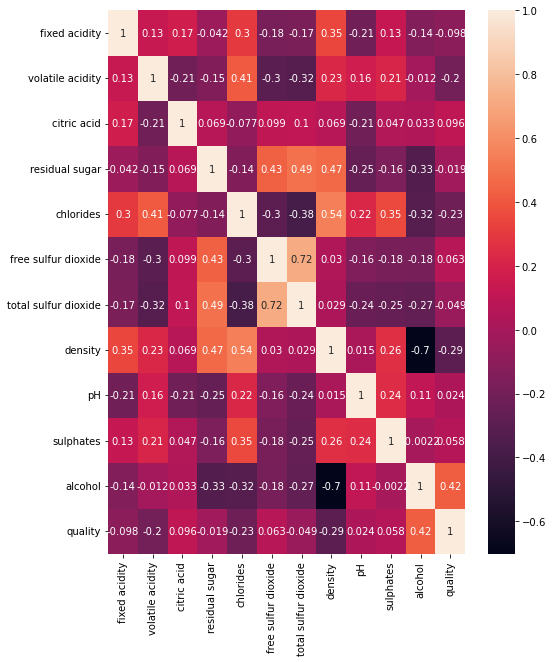

In [29]:
plt.figure(figsize=(8,10))
sns.heatmap(df_out.corr(),annot=True, )

In [30]:
scalar = StandardScaler()

In [31]:
lda = LinearDiscriminantAnalysis(n_components = 1)

In [32]:
skf = StratifiedKFold(n_splits=3)

In [33]:
X=df_out.iloc[:,:-1]
y=df_out.iloc[:,-1]

In [34]:
#del regressors

In [35]:
# regressors = [LinearRegression(),
#                 Lasso(),
#                 Ridge(),
#                 KNeighborsRegressor(),
#                 SVR(),
#                 DecisionTreeRegressor(),
#                 RandomForestRegressor(),
#                 AdaBoostRegressor(),
#                 GradientBoostingRegressor(),
#                 xgb.XGBRegressor()]
#CatBoostRegressor()

In [36]:
# for regressor in Regressors:
#     steps=[('scalar', scalar), 
#          ('lda',lda),
#          (f'{regressor}', regressor)]
#     model_pipeline = Pipeline(steps=steps)
#     scores = cross_val_score(model_pipeline, X, y, cv = skf) 
#     print(f'{regressor} &  score :{regressor} & avg. score : {np.mean(scores)} \n')

In [37]:
steps=[('scalar', scalar), 
     ('lda',lda)]

In [38]:
# Regression_pipeline = Pipeline([
#     ('features', steps),
#     ('regressor', LinearRegression())
# ])

#Regression_pipeline = Pipeline([('scl', StandardScaler()),('lda', LinearDiscriminantAnalysis(n_components=1)),('regressor', regressors[0])])

In [39]:
# dicts={}
# for reg in regressors:
#     Regression_pipeline.set_params(regressor=reg)
#     scores = cross_val_score(Regression_pipeline, X, y, scoring='neg_mean_squared_log_error', cv=skf)
#     dicts[reg]=scores

In [40]:
#dicts

In [41]:
#scores

In [42]:
# regressors1 = { "LR":LinearRegression(),
#                "Lasso": Lasso(),
#                "Ridge": Ridge(),
#                "KNN": KNeighborsRegressor(),
#                "SVR":SVR(),
#                "DT": DecisionTreeRegressor(),
#                "RF": RandomForestRegressor(),
#                "ABR": AdaBoostRegressor(),
#                "GBR": GradientBoostingRegressor(),
#                "XGBR": xgb.XGBRegressor()
#              }

# LR = LinearRegression()
# Lasso =  Lasso(random_state=4)
# Ridge =  Ridge(random_state=4)
# KNN =  KNeighborsRegressor()
# SVR = SVR()
# DT =  DecisionTreeRegressor(random_state=4)
# RF =  RandomForestRegressor(random_state=4)
# ABR =  AdaBoostRegressor(random_state=4)
# GBR =  GradientBoostingRegressor(random_state=4)
# XGBR =  xgb.XGBRegressor(random_state=4)



In [43]:
LR = LinearRegression()
Lasso =  Lasso()
Ridge =  Ridge(random_state=4)
KNN =  KNeighborsRegressor()
SVR = SVR()
DT =  DecisionTreeRegressor(random_state=4)
RF =  RandomForestRegressor(random_state=4)
ABR =  AdaBoostRegressor(random_state=4)
GBR =  GradientBoostingRegressor(random_state=4)
XGBR =  xgb.XGBRegressor(random_state=4)

In [49]:
param_lr = {}
param_lr['regressor'] = [LR]

param_lasso = {}
param_lasso['regressor__random_state']=[4]
param_lasso['regressor__alpha']=np.linspace(0, 0.2, 21)
param_lasso['regressor'] = [Lasso]

param_ridge = {}
param_ridge['regressor__random_state']=[4]
param_ridge['regressor__alpha']=np.linspace(0, 0.2, 21)
param_ridge['regressor'] = [Ridge]

param_KNN = {}
param_KNN['regressor__n_neighbors']=[2,3,6,9,11,13,15]
param_KNN['regressor__weights']=['uniform','distance']
param_KNN['regressor__algorithm']=['auto', 'ball_tree', 'kd_tree', 'brute']
param_KNN['regressor__leaf_size']=[10,20,30,40,50]
param_KNN['regressor__p']=[1, 2]
param_KNN['regressor__metric']=['minkowski','euclidean','manhattan']
param_KNN['regressor'] = [KNN]

param_SVR = {}
param_SVR['regressor__C']=[0.1,1, 10, 100]
param_SVR['regressor__gamma']=[1,0.1,0.01,0.001]
param_SVR['regressor__kernel']=['rbf', 'poly', 'sigmoid']
param_SVR['regressor__verbose']=[1,2]
param_SVR['regressor__max_iter']=[1,2,3,10]
param_SVR['regressor'] = [SVR]

param_DTR = {}
param_DTR['regressor__criterion']=["mse", "mae"]  
param_DTR['regressor__splitter']=['best','random']
param_DTR['regressor__max_depth' ] =  [1,3,5,7,9,11,12]
param_DTR['regressor__min_samples_leaf'] = [1,3,5,10]
param_DTR['regressor__ccp_alpha']=[0.1, .01, .001]##np.arange(0, 1, 0.2).tolist()
param_DTR['regressor__min_weight_fraction_leaf'] = [0.1,0.3,0.5,0.7,0.9]
param_DTR['regressor__max_features'] = ['auto','log2','sqrt']
param_DTR['regressor__random_state']=[4]
param_DTR['regressor__max_leaf_nodes'] = [10,20]
param_DTR['regressor'] = [DT]

param_RFR = {}
param_RFR['regressor__n_estimators'] = [100]
param_RFR['regressor__ccp_alpha']=[0.1, .01, .001,1]##np.arange(0, 1, 0.001).tolist()
param_RFR['regressor__random_state']=[4]
param_RFR['regressor__max_depth'] =  [1,3,5,7,9,11,12]
param_RFR['regressor__min_samples_leaf'] = [1,3,5,10]
# # param_RFR['regressor__min_weight_fraction_leaf'] = [0.1,0.3,0.5,0.7,0.9]
param_RFR['regressor__max_features'] = ['auto','log2','sqrt']
param_RFR['regressor__max_leaf_nodes'] = [10,20,30]
#param_RFR['regressor__criterion']=["mse", "mae"]    
param_RFR['regressor__bootstrap'] = [True, False]
param_RFR['regressor'] = [RF]

param_ABR = {}
param_ABR['regressor__random_state']=[4]
param_ABR['regressor__n_estimators']=list(range(2, 102, 2))
param_ABR['regressor__learning_rate']=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_ABR['regressor'] = [ABR]

#GradientBoostingRegressor parameter
param_GBR = {}	
param_GBR['regressor__random_state']=[4]
param_GBR['regressor__n_estimators']=[100]
param_GBR['regressor__learning_rate']=[0.1, 0.2, 0.7, 0.8, 0.9, 1]
param_GBR['regressor__max_depth']= [1,3,5,7,9,11,12]
#param_GBR['regressor__subsample']= [.5,.75,1]
param_GBR['regressor__min_samples_leaf'] = [1,3,5,10]
#param_GBR['regressor__min_weight_fraction_leaf'] = [0.1,0.3,0.5,0.7,0.9]
param_GBR['regressor__max_features'] = ['auto','log2','sqrt']
param_GBR['regressor__max_leaf_nodes'] = [10,20,30]
param_GBR['regressor'] = [GBR]

#XGBRegressor parameters
param_XGBR = {}
param_XGBR['regressor__max_depth']=[1,3,5,7,9,11,12]
param_XGBR['regressor__learning_rate'] =  [0.001, 0.01, 0.1, 0.2]
# param_XGBR['regressor__subsample'] =  [0.5, 0.6, 0.7]
# param_XGBR['regressor__colsample_bytree'] =  [0.4, 0.5, 0.6]
# param_XGBR['regressor__colsample_bylevel'] =  [0.4, 0.5, 0.6]
# param_XGBR['regressor__min_child_weight'] =  [0.5, 1.0, 3.0]
param_XGBR['regressor__gamma'] =  [0, 0.25, 0.5, 1.0]
param_XGBR['regressor__reg_lambda'] =  [0.1, 1.0, 5.0]
param_XGBR['regressor__n_estimators'] = [100]
param_XGBR['regressor']=[XGBR]


In [50]:
steps=[('scalar', scalar), 
     ('lda',lda),
    ('regressor', LR)]

In [53]:
pipeline = Pipeline(steps=steps)
params = [param_lr, param_lasso, param_ridge, param_KNN, param_SVR, param_DTR, param_RFR,param_ABR,param_GBR,param_XGBR]
#params = [param_XGBR]

In [54]:
%%time
gs = GridSearchCV(pipeline, params, cv=skf, n_jobs=-1, scoring='neg_mean_squared_error').fit(X,y)


Wall time: 1h 22min 3s


In [55]:
# Get the results
print(gs.best_score_)
print(gs.best_estimator_) 
print(gs.best_params_)


-0.47285666555028166
Pipeline(steps=[('scalar', StandardScaler()),
                ('lda', LinearDiscriminantAnalysis(n_components=1)),
                ('regressor', Lasso(alpha=0.15, random_state=4))])
{'regressor': Lasso(alpha=0.15, random_state=4), 'regressor__alpha': 0.15, 'regressor__random_state': 4}


In [56]:
print(gs.cv_results_)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [57]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor,param_regressor__alpha,param_regressor__random_state,param_regressor__algorithm,param_regressor__leaf_size,param_regressor__metric,...,param_regressor__n_estimators,param_regressor__learning_rate,param_regressor__reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.494855,0.007366,0.015573,0.000000,LinearRegression(),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,{'regressor': LinearRegression()},-0.608200,-0.429187,-0.455888,-0.497758,0.078851,3515
1,0.223963,0.217388,0.010417,0.007366,"Lasso(alpha=0.15, random_state=4)",0.0,4,NaN,NaN,NaN,...,NaN,NaN,NaN,"{'regressor': Lasso(alpha=0.15, random_state=4...",-0.608200,-0.429187,-0.455888,-0.497758,0.078851,3515
2,0.041668,0.007364,0.005208,0.007365,"Lasso(alpha=0.15, random_state=4)",0.01,4,NaN,NaN,NaN,...,NaN,NaN,NaN,"{'regressor': Lasso(alpha=0.15, random_state=4...",-0.599587,-0.430060,-0.454184,-0.494610,0.074880,3453
3,0.052084,0.007366,0.005209,0.007366,"Lasso(alpha=0.15, random_state=4)",0.02,4,NaN,NaN,NaN,...,NaN,NaN,NaN,"{'regressor': Lasso(alpha=0.15, random_state=4...",-0.591306,-0.431045,-0.452675,-0.491675,0.071001,2562
4,0.052086,0.007366,0.000000,0.000000,"Lasso(alpha=0.15, random_state=4)",0.03,4,NaN,NaN,NaN,...,NaN,NaN,NaN,"{'regressor': Lasso(alpha=0.15, random_state=4...",-0.583357,-0.432141,-0.451359,-0.488952,0.067214,2471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,1.588464,0.145317,0.013009,0.000817,"XGBRegressor(base_score=None, booster=None, co...",NaN,NaN,NaN,NaN,NaN,...,100,0.2,1.0,"{'regressor': XGBRegressor(base_score=None, bo...",-0.567230,-0.439592,-0.469307,-0.492043,0.054532,2590
16547,1.575788,0.157424,0.013009,0.000817,"XGBRegressor(base_score=None, booster=None, co...",NaN,NaN,NaN,NaN,NaN,...,100,0.2,5.0,"{'regressor': XGBRegressor(base_score=None, bo...",-0.561786,-0.432114,-0.465361,-0.486420,0.054993,1925
16548,1.638499,0.036139,0.013343,0.000472,"XGBRegressor(base_score=None, booster=None, co...",NaN,NaN,NaN,NaN,NaN,...,100,0.2,0.1,"{'regressor': XGBRegressor(base_score=None, bo...",-0.590036,-0.460567,-0.479872,-0.510158,0.057029,3723
16549,1.513077,0.040336,0.013343,0.000472,"XGBRegressor(base_score=None, booster=None, co...",NaN,NaN,NaN,NaN,NaN,...,100,0.2,1.0,"{'regressor': XGBRegressor(base_score=None, bo...",-0.571659,-0.444786,-0.472844,-0.496430,0.054414,3486


In [ ]:
# steps=[('scalar', scalar), 
#      ('lda', LinearDiscriminantAnalysis()),
#      ('regressor', Lasso())]
# model_pipeline = Pipeline(steps=steps)
# sorted(model_pipeline.get_params().keys())